<a href="https://colab.research.google.com/github/guntsvzz/CP_Project/blob/main/EEG_Stress_CNN_Unchunking_Cleaned_CrossEntropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
!gdown --id 1KZjrJfUrB_k1g8VUsohNpek_hvWNqGcr

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1KZjrJfUrB_k1g8VUsohNpek_hvWNqGcr
To: /content/Clean_signal.zip
100% 113M/113M [00:00<00:00, 214MB/s] 


In [34]:
!unzip '/content/Clean_signal.zip'
#!mv '/content/clean_exp16' 'Cleaned_signal'

Archive:  /content/Clean_signal.zip
replace __MACOSX/._Clean_signal? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._Clean_signal  
  inflating: Clean_signal/PSS10 - Sheet1.csv  
  inflating: __MACOSX/Clean_signal/._PSS10 - Sheet1.csv  
  inflating: Clean_signal/clean_exp08.csv  
  inflating: __MACOSX/Clean_signal/._clean_exp08.csv  
  inflating: Clean_signal/clean_exp09.csv  
  inflating: __MACOSX/Clean_signal/._clean_exp09.csv  
  inflating: Clean_signal/clean_exp01.csv  
  inflating: __MACOSX/Clean_signal/._clean_exp01.csv  
  inflating: Clean_signal/clean_exp15.csv  
  inflating: __MACOSX/Clean_signal/._clean_exp15.csv  
  inflating: Clean_signal/clean_exp14.csv  
  inflating: __MACOSX/Clean_signal/._clean_exp14.csv  
  inflating: Clean_signal/clean_exp16.csv  
  inflating: __MACOSX/Clean_signal/._clean_exp16.csv  
  inflating: Clean_signal/clean_exp02.csv  
  inflating: __MACOSX/Clean_signal/._clean_exp02.csv  
  inflating: Clean_signal/clean_exp03.csv  
  inflatin

In [35]:

pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
pip install components

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
import pickle
import numpy as np
import os
import mne
import pandas as pd
pickle.format_version

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms  
from torch.utils.data import DataLoader, Dataset  
from torch.utils.data import TensorDataset
from torch.autograd import Variable

import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# setting seed so that splitting process and training process can be reproduce
torch.manual_seed(42)

# ETL

In [107]:
import os
main_path = os.getcwd()
filename = os.listdir(main_path + '/Clean_signal/')

In [108]:
filename = ['clean_exp01.csv',
 'clean_exp02.csv',
 'clean_exp03.csv',
 'clean_exp04.csv',
 'clean_exp05.csv',
 'clean_exp06.csv',
 'clean_exp07.csv',
 'clean_exp08.csv',
 'clean_exp09.csv',
 'clean_exp10.csv',
 'clean_exp11.csv',
 'clean_exp12.csv',
 'clean_exp13.csv',
 'clean_exp14.csv',
 'clean_exp15.csv',
 'clean_exp16.csv',
 'clean_exp17.csv']

In [109]:
all_file_path = main_path + '/Clean_signal/'
X_list = list()
for file in filename:
    file_path = all_file_path + file
    df = pd.read_csv(file_path, index_col=None)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    X_list.append(df) 

In [110]:
df.head()

,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,1.558541e-13,1.202787e-12,-1.822815e-12,-6.666149e-13,-1.524659e-14,-9.656176e-14,1.778769e-13,-7.318365e-13,-3.218725e-14,6.776264e-15,2.463172e-12,-5.293956e-13,1.679243e-13,2.774456e-12,-3.303428e-13,2.217109e-13
1,-2.495299e+02,-2.591266e+02,-2.392414e+02,-2.472481e+02,-1.342918e+02,-2.469675e+02,-2.368676e+02,-2.375381e+02,8.964020e+01,9.114929e+01,9.105020e+01,7.684951e+01,1.383037e+02,-4.155527e+02,-3.083336e+02,-1.145710e+02
2,-1.022146e+02,-1.071695e+02,-8.913196e+01,-9.320015e+01,-7.188064e+01,-9.669399e+01,-7.360927e+01,-7.934479e+01,-8.483305e+00,-3.966042e+00,6.921319e-02,-5.860820e+00,6.340924e+00,-1.006591e+02,-7.385641e+01,-3.186257e+01
3,-1.894707e+02,-1.985657e+02,-1.666088e+02,-1.773347e+02,-1.206077e+02,-1.861381e+02,-1.566157e+02,-1.616160e+02,1.053098e+01,1.359837e+01,2.570865e+01,1.375228e+01,4.319836e+01,-2.383818e+02,-1.751361e+02,-7.472951e+01
4,-1.976600e+02,-2.088452e+02,-1.691085e+02,-1.829386e+02,-1.219805e+02,-1.981792e+02,-1.664133e+02,-1.711082e+02,5.430791e+00,5.540176e+00,2.039321e+01,9.522058e+00,4.153111e+01,-2.713544e+02,-1.985949e+02,-9.082392e+01


In [111]:
X = np.array(X_list)
X.shape 
#17 people 
#250 hz * 60 secs * 3 min
#16 channels

(17, 45000, 16)

In [112]:
# Reshape
X = np.transpose(X, (0, 2, 1))
X.shape

(17, 16, 45000)

In [113]:
y_path = '/content/Clean_signal/PSS10 - Sheet1.csv'
df = pd.read_csv(y_path)
y = np.array(df['label'])
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

# Split Data

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False, stratify = None)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13, 16, 45000) (4, 16, 45000) (13,) (4,)


In [115]:
#print(X_test)

In [116]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=999)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(11, 16, 45000) (2, 16, 45000) (11,) (2,)


In [117]:
from sklearn.preprocessing import MinMaxScaler

#scale transform each channel independently
scalers = {}
for i in range(X_train.shape[2]):
    scalers[i] = MinMaxScaler(feature_range=(-1, 1))
    X_train[:, :, i] = scalers[i].fit_transform(X_train[:, :, i]) 

for i in range(X_val.shape[2]):
    X_val[:, :, i]   = scalers[i].transform(X_val[:, :, i])     
    
for i in range(X_test.shape[2]):
    X_test[:, :, i]  = scalers[i].transform(X_test[:, :, i]) 

In [118]:
print(X_train.mean(), X_val.mean(), X_test.mean())
print(X_train.min(), X_val.min(), X_test.min())
print(X_train.max(), X_val.max(), X_test.max())

-0.0035532945742628333 -0.005295317732894995 -0.0031302117490915734
-1.0 -418.85970347464144 -2797.1708453940587
1.0000000000000004 749.4431360181195 2064.2315527719506


# Define Batch size and train,test, val loader

In [121]:
X_train_tensor = torch.tensor(X_train).to(torch.float32)
y_train_tensor = torch.tensor(y_train).to(torch.float32)
X_val_tensor = torch.tensor(X_val).to(torch.float32)
y_val_tensor = torch.tensor(y_val).to(torch.float32)
X_test_tensor = torch.tensor(X_test).to(torch.float32)
y_test_tensor = torch.tensor(y_test).to(torch.float32)

# Cast data to dataloader for more convenience
training_set = TensorDataset(X_train_tensor, y_train_tensor)
testing_set = TensorDataset(X_test_tensor, y_test_tensor)
validation_set = TensorDataset(X_val_tensor, y_val_tensor)

train_batch_size = 32
val_batch_size = len(validation_set)
test_batch_size = len(testing_set)

train_loader = DataLoader(training_set, train_batch_size, shuffle=True)
val_loader = DataLoader(validation_set, val_batch_size, shuffle=True)
test_loader = DataLoader(testing_set, test_batch_size, shuffle=True)

In [122]:
for data, label in train_loader:
  print(data)
  break

tensor([[[ 0.2625,  1.0000,  0.5220,  ..., -0.1055,  0.4833, -1.0000],
         [-0.1846,  1.0000,  0.8369,  ...,  0.6823,  0.9280,  0.0450],
         [-0.6639,  1.0000,  0.5339,  ...,  0.1186,  0.7721,  0.4254],
         ...,
         [ 0.5534, -0.8758, -1.0000,  ..., -0.7690, -0.9071,  0.5299],
         [ 0.6211, -0.7073, -1.0000,  ...,  0.1866, -0.2887,  0.1363],
         [-1.0000,  0.4953, -0.4354,  ...,  0.8192,  0.1606, -1.0000]],

        [[ 0.2994, -0.1263,  0.7198,  ..., -0.3135, -0.2813, -0.9733],
         [-0.0283,  0.9211,  0.8718,  ...,  0.6713,  0.8581, -0.9717],
         [-1.0000, -0.0266,  0.6665,  ...,  0.0394,  0.1550, -1.0000],
         ...,
         [ 1.0000, -0.8192, -0.7463,  ..., -0.9722, -0.9601,  1.0000],
         [-1.0000, -0.8281, -0.7549,  ..., -1.0000, -0.8562, -0.8752],
         [-0.5561,  0.2080, -0.3849,  ...,  0.4928,  0.0105,  0.7527]],

        [[ 0.5755,  0.8754,  0.7470,  ...,  0.1080,  0.4361,  0.9391],
         [-0.3997,  0.9955,  0.8537,  ...,  0

In [123]:
data.shape

torch.Size([11, 16, 45000])

In [124]:
data.shape

torch.Size([11, 16, 45000])

In [125]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# CNN model

In [126]:

class eegConv1d(nn.Module):
    def __init__(self, input_size = 16, out_size=2):
        super().__init__()
        self.c1 = nn.Conv1d(input_size, 50, kernel_size = 3)
        self.c2 = nn.Conv1d(50, 30, kernel_size = 3)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.maxpool1d = nn.MaxPool1d(2,2)
        self.linear = nn.Linear(30 * 22497, out_size) #taking the last hidden state
        
    def forward(self, seq):
        #convo layer 8 -> 50 -> 30
        #seq shape: (11, 50, 45000)
        out = self.c1(seq)
        out = self.relu(out)
        out = self.dropout(out)
        # out shape: (11, 50, 44998)
        out = self.maxpool1d(out)
        # out shape: (11, 50, 22499)
        out = self.c2(out)
        out = self.relu(out)
        # out shape: (11, 30, 22496)
        out = out.reshape(seq.size(0), -1)
        #out shape: (30, 30*22496)
        out = self.linear(out)
        #out shape: (30*22496, 2)
        return out

In [127]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [128]:
# torch.manual_seed(999999)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = eegConv1d(input_size=16).to(device)
criterion = nn.CrossEntropyLoss()
#Good for finding Likelihood
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [129]:
epochs = 200

best_valid_loss = float('inf')
model.train()

train_losses = []
train_accs   = []
valid_losses = []
valid_accs   = []


#print(f"Training {type(model).__name__}")

for i in range(epochs):
    train_total = 0
    train_correct = 0
    val_total   = 0  
    val_correct = 0
    train_acc   = 0
    val_acc     = 0
    
    for X_train, y_train in train_loader:
    
        start_time = time.time()
        
        X_train = X_train.float().to(device)
        y_train = y_train.type(torch.LongTensor).to(device)

        #print(X_train.shape, X_train.dtype)

        yhat_train = model(X_train)
        
        #train acc
        _, predicted = torch.max(yhat_train.data, 1)  #returns max value, indices
        train_total += y_train.size(0)  #keep track of total
        train_correct += (predicted == y_train).sum().item()  #.item() give the raw number
        train_acc = 100 * (train_correct / train_total)
        
        #print(y_train.shape, y_train.dtype)
        
        train_loss = criterion(yhat_train, y_train)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        end_time = time.time()


        #val accuracy
        for X_val, y_val in val_loader:
            X_val = X_val.float().to(device)
            y_val = y_val.type(torch.LongTensor).to(device)
            yhat_val  = model(X_val)
            val_loss     = criterion(yhat_val, y_val)
            _, predicted = torch.max(yhat_val.data, 1)  #returns max value, indices
            val_total += y_val.size(0)  #keep track of total
            val_correct += (predicted == y_val).sum().item()  #.item() give the raw number
            val_acc = 100 * (val_correct / val_total)

        #save the best model
        if val_loss < best_valid_loss:
            best_valid_loss = val_loss
            #print("Model:{} saved.".format(type(model).__name__))
            torch.save(model.state_dict(), './models/CNN1D.pt')
            best_model_index = i

          #for plotting
        train_losses.append(train_loss.item())
        train_accs  .append(train_acc)
        valid_losses.append(val_loss.item())
        valid_accs  .append(val_acc)


        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f"Epoch: {i:2.0f} | Train acc: {train_acc: 2.2f} | " +
          f"loss: {train_loss:2.5f} | Val acc: {val_acc: 2.2f} | " +
          f"loss: {val_loss:2.5f} | Time: {epoch_mins}m {epoch_secs}s")

Epoch:  0 | Train acc:  63.64 | loss: 0.67505 | Val acc:  50.00 | loss: 4.10706 | Time: 0m 0s
Epoch:  1 | Train acc:  63.64 | loss: 2.05324 | Val acc:  50.00 | loss: 1.40059 | Time: 0m 0s
Epoch:  2 | Train acc:  100.00 | loss: 0.15380 | Val acc:  50.00 | loss: 9.04791 | Time: 0m 0s
Epoch:  3 | Train acc:  36.36 | loss: 1.10531 | Val acc:  0.00 | loss: 0.88647 | Time: 0m 0s
Epoch:  4 | Train acc:  100.00 | loss: 0.05392 | Val acc:  50.00 | loss: 2.24376 | Time: 0m 0s
Epoch:  5 | Train acc:  90.91 | loss: 0.17922 | Val acc:  50.00 | loss: 3.29291 | Time: 0m 0s
Epoch:  6 | Train acc:  90.91 | loss: 0.35457 | Val acc:  50.00 | loss: 3.53350 | Time: 0m 0s
Epoch:  7 | Train acc:  90.91 | loss: 0.31063 | Val acc:  50.00 | loss: 2.89628 | Time: 0m 0s
Epoch:  8 | Train acc:  90.91 | loss: 0.16084 | Val acc:  50.00 | loss: 2.10049 | Time: 0m 0s
Epoch:  9 | Train acc:  100.00 | loss: 0.03824 | Val acc:  50.00 | loss: 1.22711 | Time: 0m 0s
Epoch: 10 | Train acc:  100.00 | loss: 0.00650 | Val acc: 

In [130]:
y_train.shape

torch.Size([11])

In [131]:
yhat = model(X_test_tensor.float().to(device))
#testloss = criterion(yhat, y_test_tensor.type(torch.LongTensor).to(device))
_, predicted = torch.max(yhat.data, 1)

predicted

tensor([0, 0, 0, 0], device='cuda:0')

Text(0, 0.5, 'loss')

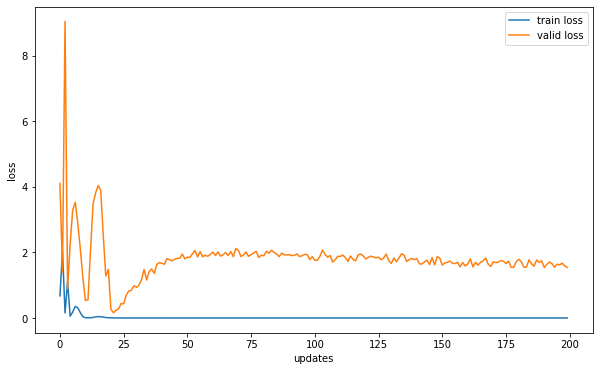

In [132]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
ax  = fig.add_subplot(1, 1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(valid_losses, label = 'valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss')

In [133]:
train_losses

[0.675048291683197,
 2.053236246109009,
 0.15380220115184784,
 1.1053067445755005,
 0.053921498358249664,
 0.17921888828277588,
 0.35456955432891846,
 0.31062567234039307,
 0.1608390361070633,
 0.03824475780129433,
 0.006502033676952124,
 0.0037277527153491974,
 0.007524594198912382,
 0.016313744708895683,
 0.03284941986203194,
 0.03999921679496765,
 0.03973234072327614,
 0.02592817135155201,
 0.012291228398680687,
 0.006370546296238899,
 0.003509231610223651,
 0.0018831894267350435,
 0.00098489283118397,
 0.0005350197898223996,
 0.00042879011016339064,
 0.0002401618694420904,
 0.00014604837633669376,
 0.00010007721721194685,
 8.405201515415683e-05,
 6.111629045335576e-05,
 5.361771764000878e-05,
 4.960806472809054e-05,
 4.7050216380739585e-05,
 4.967100903741084e-05,
 4.1252504161093384e-05,
 4.435031587490812e-05,
 3.90305976907257e-05,
 3.6311008443590254e-05,
 4.257245745975524e-05,
 4.959143552696332e-05,
 4.712166264653206e-05,
 4.8269495891872793e-05,
 4.397969678393565e-05,
 4.

In [134]:
y_test

array([0, 0, 1, 1])

In [135]:
model = eegConv1d().to(device)
model.load_state_dict(torch.load('./models/CNN1D.pt'))

model.eval()

with torch.no_grad():
    total   = 0
    correct = 0
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        predictions   = model(X_test)
        test_loss     = criterion(predictions, y_test.to(torch.long))
        # .to(torch.int64)
        _, predicted = torch.max(predictions, 1)  #returns max value, indices

        total += y_test.size(0)
        correct += (predicted == y_test).sum().item()  #.item() give the raw number
        acc = 100 * (correct / total)
    
print(f"Accuracy: {acc:2.3f}")

Accuracy: 75.000
